
# Práctica 3: Metaheurísticas basadas en poblaciones - Algoritmos Genéticos

<center><h3>
    Diego Barreiro Pérez
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Escribe el código de tu o tus soluciones/respuestas en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Geneticos.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Geneticos.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Geneticos.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.


## Preliminares adicionales sobre Python


Además de lo visto en las prácticas anteriores, conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte útiles más adelante en la realización de esta práctica y en el uso del lenguaje en general.


Por ejemplo, cuando necesitas consultar documentación sobre paquetes Python, conviene que conozcas la versión que estás utilizando en tu entorno para poder encontrar las especificidades de cada *release*. Fíjate que en la sección *Docs by version* de la web https://docs.python.org/3/ puedes seleccionar los documentos de referencia de la versión.

Para averiguar la versión que está ejecutando este Jupyter Noteboook puedes emplear las siguientes líneas.

In [1]:
from platform import python_version

print(python_version())

3.9.7


Un paquete interesante puede ser `statistics`. Conociendo la versión, puedes puedes consultar la documentación y la lista completa de funciones disponibles: https://docs.python.org/3/library/statistics.html

A modo ilustrativo, puedes obtener estadísticos sobre series de datos de la siguiente forma.

In [2]:
import statistics

# ejemplo de obtención de medias y desviaciones típicas
listav = [1, 2, 3, 4, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)

listav = [1.0, 2.5, 3.75, 4.25, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)

3 1.5811388300841898
3.3 1.5751984002023365


Otro paquete que puede resultarte útil a la hora de crear un informe o documentar tu práctica puede ser `matplotlib.pyplot`, que permite hacer gráficas de manera integrada en el propio Notebook. Puedes consultar sus capacidades en https://matplotlib.org/stable/gallery/index.html

Veámos un ejemplo ilustrativo.

<IPython.core.display.Javascript object>


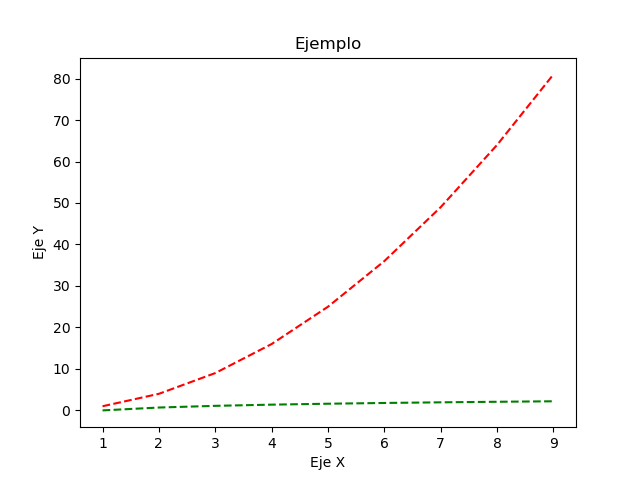

In [3]:
# Indicamos al Notebook que queremos figuras interactivas (esto sólo es necesario hacerlo una vez)
%matplotlib notebook

import matplotlib.pyplot as plt  # Importamos la librería (esto sólo es necesario hacerlo una vez)
import math

# definimos algunas líneas de tendencia arbitrarias
vectorx = [x for x in range (1,10)]
vectorlogy = [ math.log(i) for i in vectorx ]
vectorpowy = [ math.pow(i, 2) for i in vectorx ]

fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(vectorx, vectorlogy, '--', color="green")
ax.plot(vectorx, vectorpowy, '--', color="red")
 
ax.set_title("Ejemplo")  # Ponemos un título
ax.set_xlabel("Eje X")  # Nombramos los ejes
ax.set_ylabel("Eje Y")
 
plt.show()  # Mostramos a figura por pantalla, que se corresponde con la fig creada arriba

Por ejemplo, puedes generar números aletorios de la siguiente forma utilizando el paquete random.

In [4]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y números aleatorios entre 0 y 1 siguiendo también una distribución uniforme
numero_U = random.uniform(0,1)
print (numero_U)

6
0.0427676555072205


Puedes generar listas de números predefinidos o aleatorios y posteriormente barajarlos de manera aleatoria utilizando las **[list comprehensions](https://jakevdp.github.io/WhirlwindTourOfPython/11-list-comprehensions.html)** de Python y la funcion **shuffle** de la siguiente forma:

In [5]:
vector = [x for x in range (1,10)]
print ("vector fijo ", vector)

random.shuffle(vector)
print (vector)

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

random.shuffle(vector_aleatorio)
print (vector_aleatorio)

vector fijo  [1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 6, 5, 2, 3, 7, 1, 4, 9]
vector aleatorio  [10, 4, 5, 8, 8, 8, 5, 9, 5]
[9, 8, 10, 8, 4, 5, 5, 5, 8]


También podéis generar una lista de números aleatorios sin repetición en un rango determinado (permutación del rango).

In [6]:
print(random.sample(range(1,10), 9))

[8, 1, 7, 6, 4, 9, 5, 3, 2]


Finalmente, funciones del módulo `time` te permitirían obtener de manera aproximada tiempos de ejecución de secciones concretas de código. 

In [7]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.16010427474975586 segundos ----


## El Problema del Viajante de Comercio (VC) con Algoritmos Genéticos

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de poblaciones conocida como Algoritmo Genético (GA, del inglés *Genetic  Algorithm*). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)


La definición del problema sigue la descripción ya vista en las prácticas anterior, en la que se disponía de una represetación del problema mediante un grafo ponderado. Así que, en primer lugar importa el módulo Python que acompaña esta práctica, que ya trae las funciones de apoyo como la clase `Localizaciones` que implementaba la carga de datos y que utilizaba una matriz de adyacencia.

In [8]:
from helpers_mod_ga import *

Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km para el problema de las 8 ciudades gallegas.

In [9]:
g1 = Localizaciones(filename='./data/grafo8cidades.txt')
print(g1.distancia(0,1))
g2 = Localizaciones(filename='./data/US120.txt')
print(g2.distancia(0,1))

55.88273580792048
1596.5471930797373


Finalmente, funciones del módulo `time` te permitirían obtener de manera aproximada tiempos de ejecución de secciones concretas de código.

In [10]:
import matplotlib.patches as mpatches

# Se define además una función que dibuja en un gráfico las ciudades y los caminos
def visualizar(loc, sol):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='rectilinear')
    ax.set_title("Camino")
    for i in range(0, loc.nciudades):
        ciudad = loc.tablaciudades[i][::-1]
        ax.plot(ciudad[0], ciudad[1], "or")
    for i in range(0, len(sol)-1):
        c1 = loc.tablaciudades[sol[i]][::-1]
        c2 = loc.tablaciudades[sol[i+1]][::-1]
        ax.plot([c1[0], c2[0]], [c1[1], c2[1]], 'k-', lw=2)
    if len(sol) > 0:
        c0 = loc.tablaciudades[0][::-1]
        c1 = loc.tablaciudades[sol[0]][::-1]
        c2 = loc.tablaciudades[sol[len(sol)-1]][::-1]
        ax.plot([c0[0], c1[0]], [c0[1], c1[1]], 'k-', lw=2)
        ax.plot([c2[0], c0[0]], [c2[1], c0[1]], 'k-', lw=2)
    plt.show()

<IPython.core.display.Javascript object>


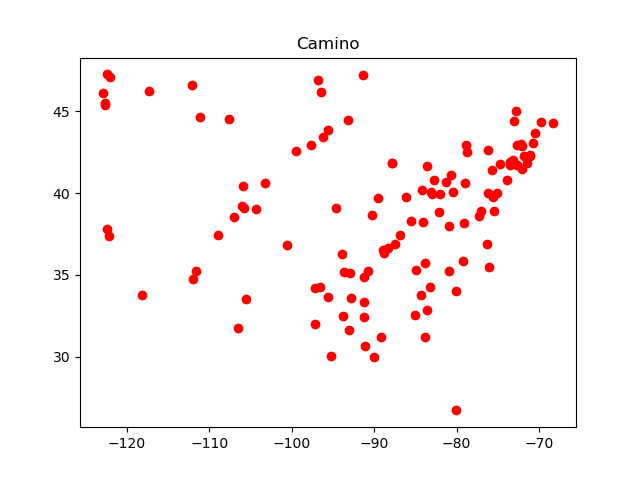

In [11]:
visualizar(g2, [])


## P3.1: Implementación básica de Algoritmo Genético



Implementa un algoritmo genético básico para resolver el problema del VC, siguiendo la descripción algorítmica de la MH vista en la clase expositiva (Véase la diapositiva 11 y asociadas del T2, "Diapositivas de clase (I): computación bioinspirada y algoritmos genéticos").

Ten en cuenta las siguientes consideraciones de diseño para completar esta implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones) comenzando y finalizando en la ciudad 0. 

- Población inicial: inicialización completamente aleatoria de la población inicial, que sean permutaciones válidas.

- Operador de cruce: Order Crossover (OX). _[Diapositiva 33]_

- Operador de mutación: operador de intercambio, con probabilidad de mutación pm=0.25.

- El reemplazo de la generación debe ser con elitismo. En particular, haz que la mitad de la población resultante del reemplazo provenga de la generación actual mientras que la otra mitad provenga de los descendientes, tomando en ambos casos los mejores individuos.

- Condición de parada simple basado en un número de iteraciones máximo pasado como parámetro.

- La implementación debe ser completamente parametrizable, de forma que todos los componentes susceptibles de ser ajustados mediante parámetros deberían puedan ser establecidos en cada ejecución/problema.


Lanza varias ejecuciones para verificar que puede resolver el problema con los siguientes grafos de
ejemplo:
- grafo 8 ciudades gallegas (`data/grafo8cidades.txt`), con una población de 2 individuos y 150 iteraciones.
- grafo 120 ciudades estadounidenses (`data/US120.txt`), con una población de 32 individuos y 500 iteraciones.


Si no te convergiera, prueba a extender el número de iteraciones o variar parámetros como la probabilidad de mutación.



In [12]:
# REPRESENTACIÓN DE LAS SOLUCIONES
# En este caso, se cambia la representación de las soluciones eliminando las ciudades inicial y final
# para facilitar el tema de las mutaciones y combinaciones.
# [1, 2, 3, 4, 5, 6, 7]

In [13]:
# FUNCIÓN DE COSTE
def coste(g, sol):
    s = g.distancia(0, sol[0])
    for i in range(0, len(sol)-1):
        s += g.distancia(sol[i], sol[i+1])
    s += g.distancia(sol[len(sol) - 1], 0)
    return s

In [14]:
# SOLUCIÓN INICIAL
def genera_solucion_inicial(g):
    sol = [x for x in range(1, g.nciudades)]
    random.shuffle(sol)
    return sol

# POBLACIÓN INICIAL
def genera_poblacion_inicial(g, cantidad):
    return [genera_solucion_inicial(g) for i in range(cantidad)]

In [15]:
# Función adicional que dada una población, genera para cada solución
# una dupla con la solución y su coste.
# Además, ya devolverá las soluciones ordenadas por su coste.
def poblacion_con_costes(g, poblacion):
    duplas = [(sol, coste(g, sol)) for sol in poblacion]
    return sorted(duplas, key=lambda d: d[1])

# Función que copia toda la población a un nuevo array.
def copia_poblacion(g, poblacion):
    return [sol.copy() for sol in poblacion]

In [16]:
# SELECCIÓN PARES
def agrupar_por_pares(g, poblacion):
    nums = [x for x in range(0, len(poblacion))]
    random.shuffle(nums)
    
    pares = []
    for i in range(0, len(nums), 2):
        pares.append((poblacion[nums[i]], poblacion[nums[i+1]]))
    
    return pares

In [17]:
# RECOMBINACIÓN
def recombinar(g, par):
    corte = random.randint(1, len(par[0])-1)

    par0, par1 = [None] * len(par[0]), [None] * len(par[1])
    for i in range(corte, len(par[0])):
        par0[i], par1[i] = par[1][i], par[0][i]
    
    i0, i1 = 0, 0
    for i in range(0, len(par0)):
        if par[0][i] not in par1:
            par1[i0] = par[0][i]
            i0 += 1
        if par[1][i] not in par0:
            par0[i1] = par[1][i]
            i1 += 1

    return (par0, par1)

In [18]:
# MUTACION
def mutar(g, solucion, pmut):
    if random.uniform(0, 1) > pmut:
        return solucion

    pos1 = random.randint(0, len(solucion)-2)
    pos2 = random.randint(pos1+1, len(solucion)-1)
    
    solucion[pos1], solucion[pos2] = solucion[pos2], solucion[pos1]

    return solucion

In [19]:
# SELECCION DE NUEVA GENERACION
def nueva_generacion(g, padres, hijos):
    padres_costes = poblacion_con_costes(g, padres)
    hijos_costes = poblacion_con_costes(g, hijos)
    
    nueva_generacion = []
    for i in range(int(len(padres) / 2)):
        nueva_generacion.append(padres_costes[i][0])
        nueva_generacion.append(hijos_costes[i][0])
    return nueva_generacion

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). Explica también cómo has verificado tu implementación.

In [20]:
def genetico(g, npob=32, iters=500, pmut=0.25):
    poblacion = genera_poblacion_inicial(g, npob)
    mejores_soluciones = []
    
    for i in range(iters):
        padres = copia_poblacion(g, poblacion)

        hijos = []
        for par in agrupar_por_pares(g, poblacion):
            par = recombinar(g, par)
            for sol in par:
                sol = mutar(g, sol, pmut)
                hijos.append(sol)

        poblacion = nueva_generacion(g, padres, hijos)
        mejores_soluciones.append(poblacion_con_costes(g, poblacion)[0])

    return mejores_soluciones[len(mejores_soluciones) - 1]

381.6699617675482


<IPython.core.display.Javascript object>


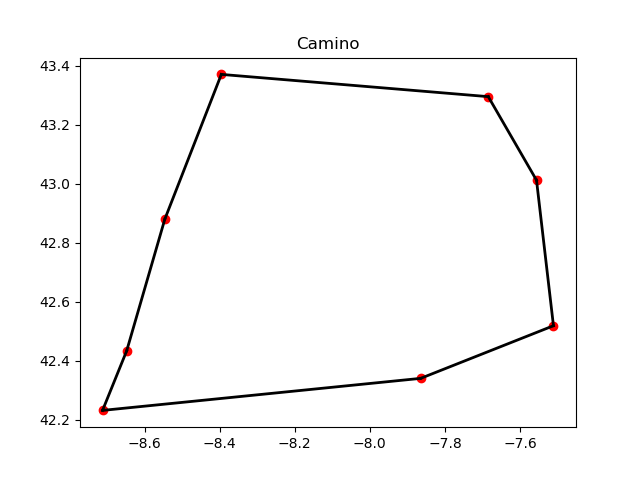

In [21]:
sol = genetico(g1, npob=2, iters=150)
print(sol[1])
visualizar(g1, sol[0])

## P3.2: Laboratorio

Como toda metaheurística, resulta crucial conocer cómo afecta en términos prácticos los parámetros
del algoritmo y los operadores desarrollados. Estudia el comportamiento del algoritmo implementado para resolver VC atendiendo a las siguientes cuestiones.


❓ **Pregunta 2**. Realiza el estudio de la calidad de la solución variando el tamaño de la población: 1, 2, 4, 8, 16, 32, 64... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué?

In [22]:
tests = 20

<IPython.core.display.Javascript object>


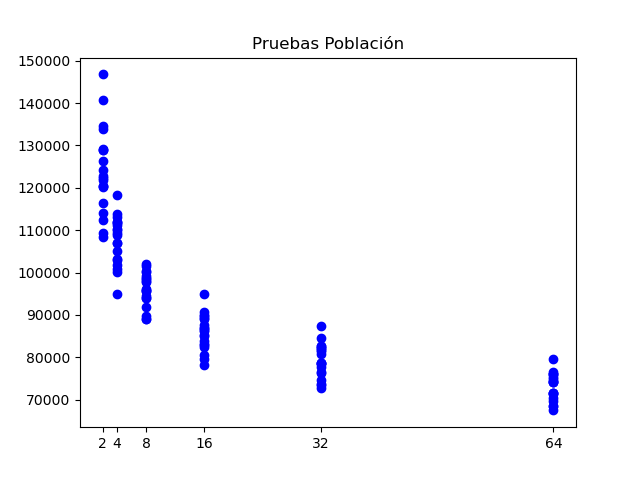

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [23]:
poblaciones = [2, 4, 8, 16, 32, 64]

fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas Población")
ax.set_xticks(poblaciones)

for pob in tqdm(poblaciones, leave=None):
    for i in tqdm(range(0, tests), leave=None):
        ax.plot(pob, genetico(g2, npob=pob)[1], "bo")
plt.show()

❓ **Pregunta 3**. Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué?

<IPython.core.display.Javascript object>


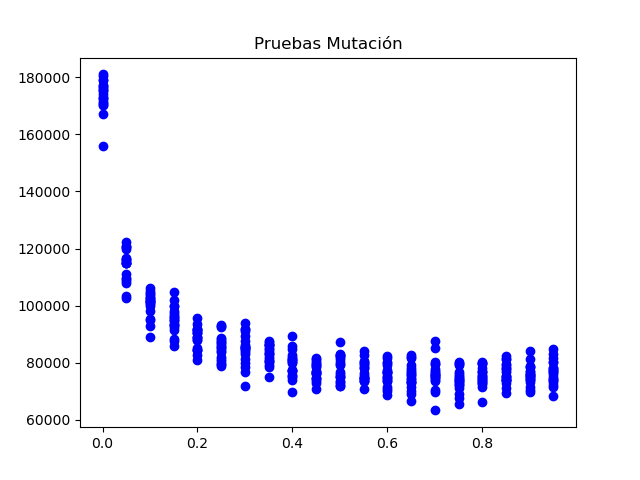

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [24]:
mutaciones = [i*0.01 for i in range(0, 100, 5)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas Mutación")

for mut in tqdm(mutaciones, leave=None):
    for i in tqdm(range(0, tests), leave=None):
        ax.plot(mut, genetico(g2, npob=16, pmut=mut)[1], "bo")
plt.show()

❓ **Pregunta 4**. Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros.

<IPython.core.display.Javascript object>


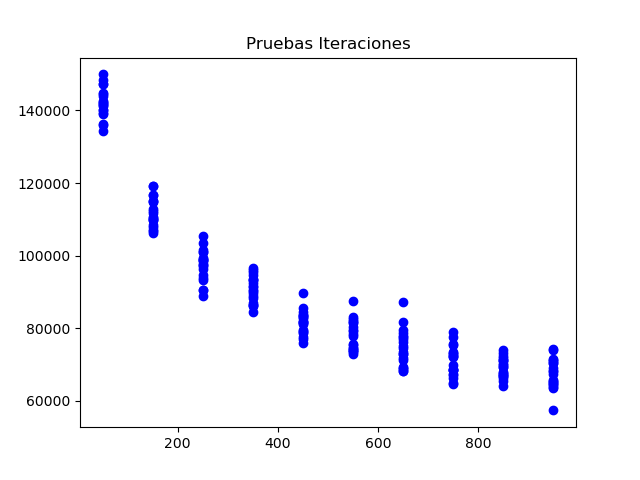

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [25]:
iteraciones = [i for i in range(50, 1000, 100)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas Iteraciones")

for iteracion in tqdm(iteraciones, leave=None):
    for i in tqdm(range(0, tests), leave=None):
        ax.plot(iteracion, genetico(g2, npob=16, iters=iteracion, pmut=0.40)[1], "bo")
plt.show()

Apoya todas tus respuestas en datos-gráficos resultantes de tus estudios.

Importante: además de la calidad de la soluciones obtenidas, se recomienda medir tiempos para tomar medidas operativas sobre el número de repeticiones que permitan realizar promedios (se recomienda no más de 10 si se ralentiza mucho) y prescindir de manera razonada de valores en las series de ejecución que no sean computacionalmente rentables/viables con tu implementación/ordenador (p.ej., tamaños de población elevados pueden tomar mucho tiempo para resolver).

# Respuestas al cuestionario (10 puntos)

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

## P3.1: Implementación básica

**❓ Pregunta 1.** [`5.0p`] Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). Explica también cómo has verificado tu implementación.

**💬 Respuesta.** Está toda la implementación programada en el código en las celdas superiores. Cada celda tiene una función del algoritmo debidamente comentada y explicada.

## P3.2: Laboratorio

❓ **Pregunta 2**. [`1.5p`] Realiza el estudio de la calidad de la solución variando el tamaño de la población: 1, 2, 4, 8, 16, 32, 64... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué?

**💬 Respuesta.** Tras realizar varias pruebas y observando el gráfico, se procede a tomar un valor de población de **`npob=16`**. Cada vez que se incrementa la población, el tiempo de ejecución se incrementa considerablemente, por lo que no es recomendable coger un valor mucho más alto debido a que se realentizaría mucho.

❓ **Pregunta 3**. [`1.5p`] Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué?

**💬 Respuesta.** Tomando como valor de la `npob=16` (del apartado anterior), se ejecuta el algoritmo con pasos de mutación de 0.00 a 0.95 cada 0.05. Como se puede apreciar, a partir de un valor de mutación de 0.35 la diferencia ya no es tan notable, por lo que se procede a tomar como valor adecuado **`pmut=0.40`**.

❓ **Pregunta 4**. [`2.0p`] Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros.

**💬 Respuesta.** Teniendo como `npob=16` y `pmut=0.40`, se procede a probar con las iteraciones de 50 a 1000 con paso de 100. Como se aprecia en el gráfico, el resultado es mejor cuantas más iteraciones se realizan, pero se va ralentizando esa mejora a partir de 450. Se podría coger los valores de 550 y 750, pero en este caso se opta por 750 ya que la diferencia en tiempo de ejecución no es mucho mayor. Por lo tanto, **`iters=750`**

Por lo tanto, tras los diferentes ejercicios de pruebas, se tienen que la combinación más eficiente en cuanto a resultado y coste de tiempo, es **`npob=16`, `pmut=0.40` y `iters=750`**. Se llegan a valores entorno a caminos de coste 65k.